# Aligning Proteins

Much of the content of this chapter is inspired by {cite}`eddy2004did`, which can be read side by side with this chapter.

## Why Align Protein Rather Than DNA Sequences?

Aligning protein sequences rather than DNA sequences provides several advantages, especially when considering evolutionary and functional analyses:

### Greater Conservation of Amino Acids Over Nucleotides

Aligning protein sequences instead of DNA sequences is often more informative for several reasons:

- **Conservation of Amino Acids**: Amino acid sequences tend to be more conserved than their corresponding DNA sequences. This is largely due to synonymous mutations, which do not alter the amino acid sequence despite changes in the DNA sequence. Such mutations are more common than might be expected if only considering the mutation frequencies of non-synonymous changes. This higher conservation level makes protein alignments particularly useful in phylogenetic analysis and in identifying functionally important regions.

- **Conservative Nature of Non-synonymous Mutations**: Even when non-synonymous mutations occur, they frequently result in amino acids with similar properties, such as polarity or size. This conservation of biochemical properties is less random and more structured compared to what would be expected by random mutation frequencies alone. This implies that natural selection favors mutations that preserve functionality, further supporting the usefulness of protein sequence alignment in evolutionary studies.

## Scoring Functions for Amino Acid Sequences

### Need for Specific Scoring Systems

While it is technically possible to use the same types of scoring functions for both DNA and protein sequences, protein alignments benefit from the use of specialized scoring matrices. Here's why:

- **Complexity of Protein Sequences**: Proteins are composed of 20 different amino acids, each with unique chemical properties, as opposed to the 4 nucleotide bases of DNA. This complexity means that the impact of substituting one amino acid for another can vary greatly

## Alignment of Protein Sequences Using BLOSUM and PAM Score Matrices

### Introduction to Score Matrices

Protein sequence alignment is a fundamental task in bioinformatics, crucial for structure prediction, functional annotation, and evolutionary studies. Two of the most commonly used scoring matrices in protein alignments are BLOSUM (Blocks Substitution Matrix) and PAM (Point Accepted Mutation). These matrices help quantify the similarity between amino acids in an alignment.

### Formula for Substitution Matrices

Both BLOSUM and PAM matrices' elements are the log odds ratio of two amino acids $i$ and $j$ replacing each other in a homologous sequence compared to them replacing each other in two unrelated sequences. These matrices are calculated based on observed substitution frequencies, adjusted by background frequencies, and are scaled for practical application in sequence alignments. The formula for the score matrix elements can be described as:

$
M_{ij} = \left\lfloor \lambda \log \left( \frac{p_{ij}}{q_i q_j} \right) \right\rceil
$

Where:
- $ p_{ij} $ is the observed probability of amino acid $ j $ being replaced by amino acid $ i $ in a given evolutionary distance.
- $ q_i $ and $ q_j $ are the background frequencies of amino acids $ i $ and $ j $, respectively.
- $ \lambda $, is an arbitrarly factor, handcrafted to minimize rounding errors when converting to integers.


#### The role of scaling with $ \lambda $: Rounding to Integers


The transition from the theoretically derived logarithmic scores, which are real numbers, to practical integer scores used in alignment algorithms involves scaling by a factor of $ \lambda $. The scaling factor $ \lambda $ is chosen such that the scaled scores remain proportional to the log-odds scores but are transformed into integers for practical use.

The use of integer values in scoring matrices like BLOSUM and PAM is indeed rooted in computational efficiency, particularly from the era when integer calculations were significantly faster than floating point calculations.  


## Understanding PAM Matrices

**PAM (Point Accepted Mutation) matrices** measure the likelihood of one amino acid being replaced by another over evolutionary time {cite}`dayhoff1978model`. A PAM1 matrix represents the probability of amino acid substitutions within 1% evolutionary divergence. Higher order PAM matrices (like PAM250) are derived by taking the matrix power of a basic PAM1 matrix to extrapolate to greater evolutionary distances.

## Understanding BLOSUM Matrices

**BLOSUM (BLOcks SUbstitution Matrix) matrices** are based on observed substitutions in blocks of local alignments of protein sequences {cite}`henikoff1992amino`. BLOSUM matrices are designed for different levels of sequence similarity: for instance, BLOSUM62 is used for sequences with about 62% similarity.


## Some example BLOSUM and PAM Matrices

To illustrate the construction and use of these matrices, we will generate visual representations of BLOSUM62 and PAM250 using Python.

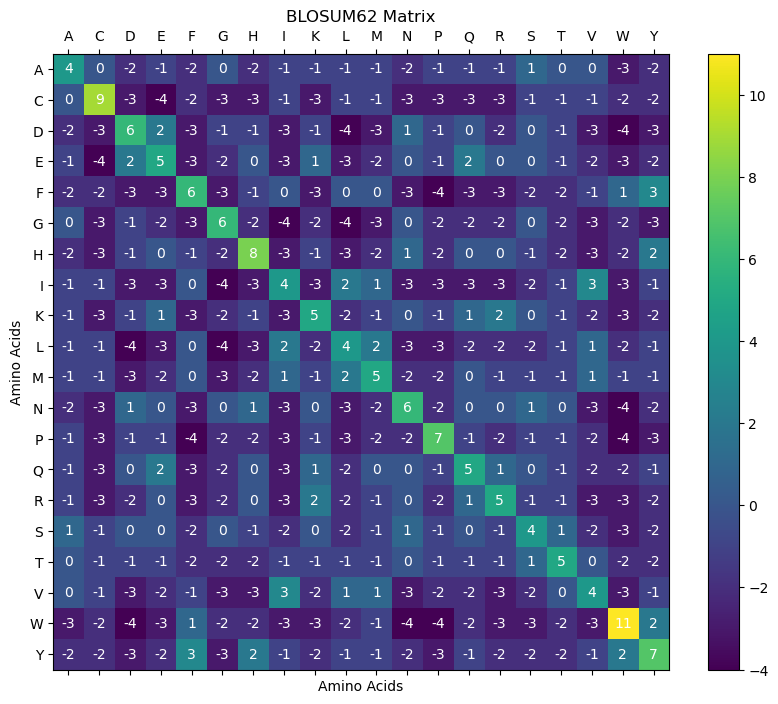

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define BLOSUM62 Matrix using a dictionary of dictionaries

blosum62 = {
    'A': {'A': 4, 'R': -1, 'N': -2, 'D': -2, 'C': 0, 'Q': -1, 'E': -1, 'G': 0, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 0, 'W': -3, 'Y': -2, 'V': 0},
    'R': {'A': -1, 'R': 5, 'N': 0, 'D': -2, 'C': -3, 'Q': 1, 'E': 0, 'G': -2, 'H': 0, 'I': -3, 'L': -2, 'K': 2, 'M': -1, 'F': -3, 'P': -2, 'S': -1, 'T': -1, 'W': -3, 'Y': -2, 'V': -3},
    'N': {'A': -2, 'R': 0, 'N': 6, 'D': 1, 'C': -3, 'Q': 0, 'E': 0, 'G': 0, 'H': 1, 'I': -3, 'L': -3, 'K': 0, 'M': -2, 'F': -3, 'P': -2, 'S': 1, 'T': 0, 'W': -4, 'Y': -2, 'V': -3},
    'D': {'A': -2, 'R': -2, 'N': 1, 'D': 6, 'C': -3, 'Q': 0, 'E': 2, 'G': -1, 'H': -1, 'I': -3, 'L': -4, 'K': -1, 'M': -3, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -4, 'Y': -3, 'V': -3},
    'C': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': 9, 'Q': -3, 'E': -4, 'G': -3, 'H': -3, 'I': -1, 'L': -1, 'K': -3, 'M': -1, 'F': -2, 'P': -3, 'S': -1, 'T': -1, 'W': -2, 'Y': -2, 'V': -1},
    'Q': {'A': -1, 'R': 1, 'N': 0, 'D': 0, 'C': -3, 'Q': 5, 'E': 2, 'G': -2, 'H': 0, 'I': -3, 'L': -2, 'K': 1, 'M': 0, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -2, 'Y': -1, 'V': -2},
    'E': {'A': -1, 'R': 0, 'N': 0, 'D': 2, 'C': -4, 'Q': 2, 'E': 5, 'G': -2, 'H': 0, 'I': -3, 'L': -3, 'K': 1, 'M': -2, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -3, 'Y': -2, 'V': -2},
    'G': {'A': 0, 'R': -2, 'N': 0, 'D': -1, 'C': -3, 'Q': -2, 'E': -2, 'G': 6, 'H': -2, 'I': -4, 'L': -4, 'K': -2, 'M': -3, 'F': -3, 'P': -2, 'S': 0, 'T': -2, 'W': -2, 'Y': -3, 'V': -3},
    'H': {'A': -2, 'R': 0, 'N': 1, 'D': -1, 'C': -3, 'Q': 0, 'E': 0, 'G': -2, 'H': 8, 'I': -3, 'L': -3, 'K': -1, 'M': -2, 'F': -1, 'P': -2, 'S': -1, 'T': -2, 'W': -2, 'Y': 2, 'V': -3},
    'I': {'A': -1, 'R': -3, 'N': -3, 'D': -3, 'C': -1, 'Q': -3, 'E': -3, 'G': -4, 'H': -3, 'I': 4, 'L': 2, 'K': -3, 'M': 1, 'F': 0, 'P': -3, 'S': -2, 'T': -1, 'W': -3, 'Y': -1, 'V': 3},
    'L': {'A': -1, 'R': -2, 'N': -3, 'D': -4, 'C': -1, 'Q': -2, 'E': -3, 'G': -4, 'H': -3, 'I': 2, 'L': 4, 'K': -2, 'M': 2, 'F': 0, 'P': -3, 'S': -2, 'T': -1, 'W': -2, 'Y': -1, 'V': 1},
    'K': {'A': -1, 'R': 2, 'N': 0, 'D': -1, 'C': -3, 'Q': 1, 'E': 1, 'G': -2, 'H': -1, 'I': -3, 'L': -2, 'K': 5, 'M': -1, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -3, 'Y': -2, 'V': -2},
    'M': {'A': -1, 'R': -1, 'N': -2, 'D': -3, 'C': -1, 'Q': 0, 'E': -2, 'G': -3, 'H': -2, 'I': 1, 'L': 2, 'K': -1, 'M': 5, 'F': 0, 'P': -2, 'S': -1, 'T': -1, 'W': -1, 'Y': -1, 'V': 1},
    'F': {'A': -2, 'R': -3, 'N': -3, 'D': -3, 'C': -2, 'Q': -3, 'E': -3, 'G': -3, 'H': -1, 'I': 0, 'L': 0, 'K': -3, 'M': 0, 'F': 6, 'P': -4, 'S': -2, 'T': -2, 'W': 1, 'Y': 3, 'V': -1},
    'P': {'A': -1, 'R': -2, 'N': -2, 'D': -1, 'C': -3, 'Q': -1, 'E': -1, 'G': -2, 'H': -2, 'I': -3, 'L': -3, 'K': -1, 'M': -2, 'F': -4, 'P': 7, 'S': -1, 'T': -1, 'W': -4, 'Y': -3, 'V': -2},
    'S': {'A': 1, 'R': -1, 'N': 1, 'D': 0, 'C': -1, 'Q': 0, 'E': 0, 'G': 0, 'H': -1, 'I': -2, 'L': -2, 'K': 0, 'M': -1, 'F': -2, 'P': -1, 'S': 4, 'T': 1, 'W': -3, 'Y': -2, 'V': -2},
    'T': {'A': 0, 'R': -1, 'N': 0, 'D': -1, 'C': -1, 'Q': -1, 'E': -1, 'G': -2, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 5, 'W': -2, 'Y': -2, 'V': 0},
    'W': {'A': -3, 'R': -3, 'N': -4, 'D': -4, 'C': -2, 'Q': -2, 'E': -3, 'G': -2, 'H': -2, 'I': -3, 'L': -2, 'K': -3, 'M': -1, 'F': 1, 'P': -4, 'S': -3, 'T': -2, 'W': 11, 'Y': 2, 'V': -3},
    'Y': {'A': -2, 'R': -2, 'N': -2, 'D': -3, 'C': -2, 'Q': -1, 'E': -2, 'G': -3, 'H': 2, 'I': -1, 'L': -1, 'K': -2, 'M': -1, 'F': 3, 'P': -3, 'S': -2, 'T': -2, 'W': 2, 'Y': 7, 'V': -1},
    'V': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': -1, 'Q': -2, 'E': -2, 'G': -3, 'H': -3, 'I': 3, 'L': 1, 'K': -2, 'M': 1, 'F': -1, 'P': -2, 'S': -2, 'T': 0, 'W': -3, 'Y': -1, 'V': 4}
}

# Define PAM250 Matrix using a dictionary of dictionaries
pam250 = {
    'A': {'A': 2, 'R': -2, 'N': 0, 'D': 0, 'C': -2, 'Q': 0, 'E': 0, 'G': 1, 'H': -1, 'I': -1, 'L': -2, 'K': -1, 'M': -1, 'F': -3, 'P': 1, 'S': 1, 'T': 1, 'W': -6, 'Y': -3, 'V': 0},
    'R': {'A': -2, 'R': 6, 'N': 0, 'D': -1, 'C': -4, 'Q': 1, 'E': -1, 'G': -3, 'H': 2, 'I': -2, 'L': -3, 'K': 3, 'M': 0, 'F': -4, 'P': 0, 'S': 0, 'T': -1, 'W': 2, 'Y': -4, 'V': -2},
    'N': {'A': 0, 'R': 0, 'N': 2, 'D': 2, 'C': -4, 'Q': 1, 'E': 1, 'G': 0, 'H': 2, 'I': -2, 'L': -3, 'K': 1, 'M': -2, 'F': -3, 'P': 0, 'S': 1, 'T': 0, 'W': -4, 'Y': -2, 'V': -2},
    'D': {'A': 0, 'R': -1, 'N': 2, 'D': 4, 'C': -5, 'Q': 2, 'E': 3, 'G': 1, 'H': 1, 'I': -2, 'L': -4, 'K': 0, 'M': -3, 'F': -6, 'P': -1, 'S': 0, 'T': 0, 'W': -7, 'Y': -4, 'V': -2},
    'C': {'A': -2, 'R': -4, 'N': -4, 'D': -5, 'C': 12, 'Q': -5, 'E': -5, 'G': -3, 'H': -3, 'I': -2, 'L': -6, 'K': -5, 'M': -5, 'F': -4, 'P': -3, 'S': 0, 'T': -2, 'W': -8, 'Y': 0, 'V': -2},
    'Q': {'A': 0, 'R': 1, 'N': 1, 'D': 2, 'C': -5, 'Q': 4, 'E': 2, 'G': -1, 'H': 3, 'I': -2, 'L': -2, 'K': 1, 'M': -1, 'F': -5, 'P': 0, 'S': -1, 'T': -1, 'W': -5, 'Y': -4, 'V': -2},
    'E': {'A': 0, 'R': -1, 'N': 1, 'D': 3, 'C': -5, 'Q': 2, 'E': 4, 'G': 0, 'H': 1, 'I': -2, 'L': -3, 'K': 0, 'M': -2, 'F': -5, 'P': -1, 'S': 0, 'T': -1, 'W': -7, 'Y': -4, 'V': -2},
    'G': {'A': 1, 'R': -3, 'N': 0, 'D': 1, 'C': -3, 'Q': -1, 'E': 0, 'G': 5, 'H': -2, 'I': -3, 'L': -4, 'K': -2, 'M': -3, 'F': -5, 'P': -1, 'S': 1, 'T': 0, 'W': -7, 'Y': -5, 'V': -1},
    'H': {'A': -1, 'R': 2, 'N': 2, 'D': 1, 'C': -3, 'Q': 3, 'E': 1, 'G': -2, 'H': 6, 'I': -2, 'L': -2, 'K': 0, 'M': -2, 'F': -2, 'P': 0, 'S': -1, 'T': -1, 'W': -3, 'Y': 0, 'V': -2},
    'I': {'A': -1, 'R': -2, 'N': -2, 'D': -2, 'C': -2, 'Q': -2, 'E': -2, 'G': -3, 'H': -2, 'I': 4, 'L': 2, 'K': -2, 'M': 2, 'F': 1, 'P': -2, 'S': -1, 'T': 0, 'W': -5, 'Y': -1, 'V': 4},
    'L': {'A': -2, 'R': -3, 'N': -3, 'D': -4, 'C': -6, 'Q': -2, 'E': -3, 'G': -4, 'H': -2, 'I': 2, 'L': 6, 'K': -3, 'M': 4, 'F': 2, 'P': -3, 'S': -3, 'T': -2, 'W': -2, 'Y': -1, 'V': 2},
    'K': {'A': -1, 'R': 3, 'N': 1, 'D': 0, 'C': -5, 'Q': 1, 'E': 0, 'G': -2, 'H': 0, 'I': -2, 'L': -3, 'K': 5, 'M': 0, 'F': -5, 'P': -1, 'S': 0, 'T': 0, 'W': -3, 'Y': -4, 'V': -2},
    'M': {'A': -1, 'R': 0, 'N': -2, 'D': -3, 'C': -5, 'Q': -1, 'E': -2, 'G': -3, 'H': -2, 'I': 2, 'L': 4, 'K': 0, 'M': 6, 'F': 0, 'P': -2, 'S': -2, 'T': -1, 'W': -4, 'Y': -2, 'V': 2},
    'F': {'A': -3, 'R': -4, 'N': -3, 'D': -6, 'C': -4, 'Q': -5, 'E': -5, 'G': -5, 'H': -2, 'I': 1, 'L': 2, 'K': -5, 'M': 0, 'F': 9, 'P': -5, 'S': -3, 'T': -3, 'W': 0, 'Y': 7, 'V': -1},
    'P': {'A': 1, 'R': 0, 'N': 0, 'D': -1, 'C': -3, 'Q': 0, 'E': -1, 'G': -1, 'H': 0, 'I': -2, 'L': -3, 'K': -1, 'M': -2, 'F': -5, 'P': 6, 'S': 1, 'T': 0, 'W': -6, 'Y': -5, 'V': -1},
    'S': {'A': 1, 'R': 0, 'N': 1, 'D': 0, 'C': 0, 'Q': -1, 'E': 0, 'G': 1, 'H': -1, 'I': -1, 'L': -3, 'K': 0, 'M': -2, 'F': -3, 'P': 1, 'S': 2, 'T': 1, 'W': -2, 'Y': -3, 'V': -1},
    'T': {'A': 1, 'R': -1, 'N': 0, 'D': 0, 'C': -2, 'Q': -1, 'E': -1, 'G': 0, 'H': -1, 'I': 0, 'L': -2, 'K': 0, 'M': -1, 'F': -3, 'P': 0, 'S': 1, 'T': 3, 'W': -5, 'Y': -3, 'V': 0},
    'W': {'A': -6, 'R': 2, 'N': -4, 'D': -7, 'C': -8, 'Q': -5, 'E': -7, 'G': -7, 'H': -3, 'I': -5, 'L': -2, 'K': -3, 'M': -4, 'F': 0, 'P': -6, 'S': -2, 'T': -5, 'W': 17, 'Y': 0, 'V': -6},
    'Y': {'A': -3, 'R': -4, 'N': -2, 'D': -4, 'C': 0, 'Q': -4, 'E': -4, 'G': -5, 'H': 0, 'I': -1, 'L': -1, 'K': -4, 'M': -2, 'F': 7, 'P': -5, 'S': -3, 'T': -3, 'W': 0, 'Y': 10, 'V': -2},
    'V': {'A': 0, 'R': -2, 'N': -2, 'D': -2, 'C': -2, 'Q': -2, 'E': -2, 'G': -1, 'H': -2, 'I': 4, 'L': 2, 'K': -2, 'M': 2, 'F': -1, 'P': -1, 'S': -1, 'T': 0, 'W': -6, 'Y': -2, 'V': 4}
}

def plot_matrix_with_labels(matrix, title="PAM250 Matrix"):
    labels = sorted(matrix.keys())  # Extract amino acid labels sorted alphabetically
    matrix_size = len(labels)
    matrix_array = np.zeros((matrix_size, matrix_size), dtype=int)
    
    for i, aa1 in enumerate(labels):
        for j, aa2 in enumerate(labels):
            matrix_array[i, j] = matrix[aa1][aa2]

    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(matrix_array, cmap='viridis')
    
    # Loop over data dimensions and create text annotations.
    for i in range(matrix_size):
        for j in range(matrix_size):
            ax.text(j, i, matrix_array[i, j], ha='center', va='center', color='white')
    
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Amino Acids')
    plt.ylabel('Amino Acids')
    plt.title(title)
    plt.show()

# Plotting the matrices
plot_matrix_with_labels(blosum62, "BLOSUM62 Matrix")

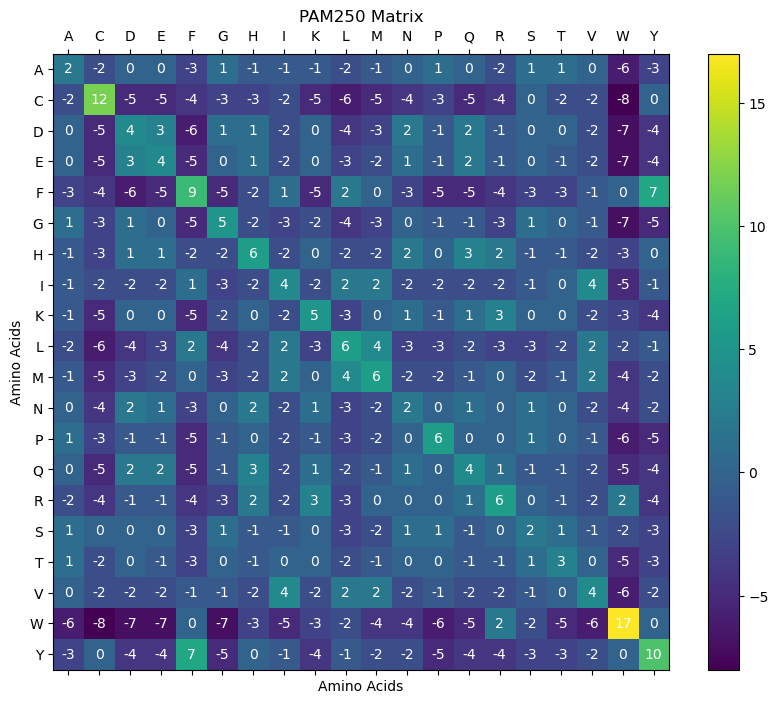

In [6]:
plot_matrix_with_labels(pam250, "PAM250 Matrix")

### Estimating Probabilities $ p_i $ and $ p_{ij} $ from Alignments

#### Background Frequencies ($ p_i $)

The probability $ p_i $ represents the background frequency of amino acid $ i $ across a set of alignments or within a single alignment, depending on the context. It is calculated by counting the occurrence of each amino acid $ i $ in all alignments and then dividing by the total number of amino acid occurrences.

##### Calculation of $ p_i $:

$ p_i = \frac{n_i}{N} $

where $ n_i $ is the number of times amino acid $ i $ appears in the alignments, and $ N $ is the total number of amino acid residues in all alignments.

#### Joint Probabilities ($ p_{ij} $)

The probability $ p_{ij} $ quantifies how often a particular substitution between amino acids $ i $ and $ j $ occurs. For symmetric matrices, the probabilities $ p_{ij} $ and $ p_{ji} $ are averaged since the direction of substitution does not impact the score.

##### Calculation of $ p_{ij} $:

$ p_{ij} = \frac{f_{ij} + f_{ji}}{2T} $

where $ f_{ij} $ and $ f_{ji} $ are the frequencies of observing amino acids $ i $ and $ j $ substituted for one another in the alignments, and $ T $ is the total number of substitutions observed.

#### Estimation Process

1. **Collect Alignment Data**: Aggregate multiple protein sequence alignments that are representative of the evolutionary distances or functional similarities of interest.

2. **Count Occurrences and Substitutions**:
   - Count each amino acid's occurrence to calculate $ p_i $.
   - Count each substitution pair (both $ ij $ and $ ji $) to determine $ f_{ij} $ and $ f_{ji} $.

3. **Normalize and Average**:
   - Normalize these counts to ensure they sum up to 1, yielding $ p_i $.
   - Average the counts of $ f_{ij} $ and $ f_{ji} $ to reflect the symmetric nature of substitutions.

#### Example in Python

Here's a Python snippet to calculate these probabilities from a mock alignment dataset. The example aims to describe the principle, and include a very limited number of alignments (1). 

In [16]:
import numpy as np

# Input data as a list of tuples of strings (aligned sequences)
alignments = [
    ("IAMAPEPTIDE", 
     "LAMVPDPWIDD")
]

# Flatten all characters into a single list for p_i calculation
all_characters = [char for seq in alignments for string in seq for char in string]

# Calculate p_i
unique, counts = np.unique(all_characters, return_counts=True)
p_i = dict(zip(unique, counts / counts.sum()))

# Calculate p_ij
pair_counts = {}
for seq1, seq2 in alignments:
    for i in range(min(len(seq1), len(seq2))):  # Ensure index is within the shortest sequence
        pair = tuple(sorted([seq1[i], seq2[i]]))  # Sort the pair to handle symmetry
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

# Normalize and ensure symmetry in the pair counts
for (a1, a2), count in list(pair_counts.items()):
    reversed_pair = (a2, a1)
    if reversed_pair in pair_counts:
        avg_count = (pair_counts[(a1, a2)] + pair_counts[reversed_pair]) / 2
        pair_counts[(a1, a2)] = avg_count
        pair_counts[reversed_pair] = avg_count
    else:
        pair_counts[reversed_pair] = count  # This line is actually redundant because of tuple(sorted([ ]))

p_ij = {pair: count / sum(pair_counts.values()) for pair, count in pair_counts.items()}

print("Background Frequencies (p_i):", p_i)
print("Joint Probabilities (p_ij):", p_ij)


Background Frequencies (p_i): {'A': 0.13636363636363635, 'D': 0.18181818181818182, 'E': 0.09090909090909091, 'I': 0.13636363636363635, 'L': 0.045454545454545456, 'M': 0.09090909090909091, 'P': 0.18181818181818182, 'T': 0.045454545454545456, 'V': 0.045454545454545456, 'W': 0.045454545454545456}
Joint Probabilities (p_ij): {('I', 'L'): 0.0625, ('A', 'A'): 0.0625, ('M', 'M'): 0.0625, ('A', 'V'): 0.0625, ('P', 'P'): 0.125, ('D', 'E'): 0.125, ('T', 'W'): 0.0625, ('I', 'I'): 0.0625, ('D', 'D'): 0.0625, ('L', 'I'): 0.0625, ('V', 'A'): 0.0625, ('E', 'D'): 0.125, ('W', 'T'): 0.0625}


## The Approximate Reasoning Behind Additative Log-Odds Scores

Understanding the logic behind sums of log-odds scores for scoring sequence alignments, like the sums we get when scoring sequence alignments by BLOSSUM or PAM scores, is quite straight forward. The primary goal is to assess the likelihood of sequences being homologous versus them occurring by random chance. This assessment is quantified using probabilities that compare alignments under the hypotheses of homology and non-homology.

To understand why additive log-odds scores, like the ones in BLOSUM and PAM matrices, are used for evaluating alignment quality, let's delve into the logic step by step. The main goal is to assess how likely an alignment between two sequences is, under the hypothesis that they are homologous versus non-homologous.

We start the likelihood ratio of observing the alignment if the sequences are homologous to the probability of observing the same alignment if they are not homologous.

$
\frac{\Pr(\text{Sequence alignment given the sequences are homologues})}{\Pr(\text{Sequence alignment given the sequences are not homologues})}
$

If we assume that the alignment is made up of independent positions, we approximate this ratio as a product of the probabilities of each alignment position $ i $:

$
\frac{\Pr(\text{align pos } i \mid \text{homologues})}{\Pr(\text{align pos } i \mid \text{not homologues})} \approx \prod_i \frac{\Pr(a_i, b_i)}{\Pr(a_i) \Pr(b_i)}
$

Here, $ \Pr(a_i, b_i) $ is the probability of observing amino acids $ a_i $ and $ b_i $ paired together, while $ \Pr(a_i) $ and $ \Pr(b_i) $ are the independent probabilities of observing $ a_i $ and $ b_i $ respectively.

We can convert this product into a summation by observing the logarithm:

$
\log\left(\prod_i \frac{\Pr(a_i, b_i)}{\Pr(a_i) \Pr(b_i)}\right) = \sum_i \log\left(\frac{\Pr(a_i, b_i)}{\Pr(a_i) \Pr(b_i)}\right)
$

The log transformation simplifies the product into a sum, making it easier to compute and interpret. The resulting sum of logarithmic ratios:

$
\sum_i \log\left(\frac{\Pr(a_i, b_i)}{\Pr(a_i) \Pr(b_i)}\right)
$

can be rewritten in terms of log-odds scores $ d(a_i, b_i) $ for each position $ i $. Apart from the scaling this also equates the log-odds ratios of score matrices, $M_{a_i b_i}$. So, the overall alignment score can be represented as:

$
C\sum_i M_{a_ib_i}
$



## Rationale for Using Log-Odds Scores

The use of log-odds scores is based on the following reasoning:

- **Quantitative Measure**: Log-odds scores provide a quantitative measure that reflects how much more likely an alignment is to occur if the sequences are homologous rather than just by random chance.

- **Additivity**: Since the log transformation converts products into sums, the scoring system becomes additive. This additivity is crucial because it allows the alignment score to be computed efficiently as the sum of independent position scores.

- **Biological Relevance**: The log-odds ratio considers not only the frequency of individual amino acids but also the frequency of their co-occurrence in homologous sequences versus their occurrence in non-homologous sequences. This method effectively captures evolutionary and functional relationships between proteins.

### Conclusion

By scoring alignments based on the sums of $ M_{a_i, b_i} $, which are the log-odds scores for each position, bioinformatics tools can efficiently and effectively differentiate between sequences that are likely to be homologous and those that are not. This scoring mechanism is critical for the accurate detection and analysis of evolutionary relationships in sequence alignment tasks. This is the reason that we are summing up positional scores when using Needleman-Wunch (instead of e.g. calculating their product). 

## References

```{bibliography}
:filter: docname in docnames
```
